# Kickstarter projects

## 1. Importing data

In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
kck=pd.read_csv('ks-projects-201801.csv')
kck.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 2. Filtering data

In [3]:
kck=kck.loc[(kck['state']=='failed')|(kck['state']=='successful')]
kck.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


## 3. Cleaning data

### 3.1. Renaming the columns

In [4]:
kck=kck.rename({'usd pledged':'usd_pledged'}, axis=1)

In [5]:
kck.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

### 3.2. Checking the data type

In [6]:
kck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 15 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null object
backers             331675 non-null int64
country             331675 non-null object
usd_pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB


In [7]:
# Computing how many days the start up campaign was active on the site
# Creating a new column with these values and convert it to integer type
kck['launched']=pd.to_datetime(kck['launched'])
kck['deadline']=pd.to_datetime(kck['deadline'])
kck['days_on_site']=round((kck['deadline']-kck['launched']).astype('int64')/(24*60*60*10**9),2)
kck['days_on_site']=kck['days_on_site'].astype('int64')
kck.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,days_on_site
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,34


In [8]:
kck['state']=kck['state'].str.replace('failed', '0').str.replace('successful', '1').astype('int64')

kck.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,days_on_site
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,50000.00,34


In [9]:
kck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 16 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null datetime64[ns]
goal                331675 non-null float64
launched            331675 non-null datetime64[ns]
pledged             331675 non-null float64
state               331675 non-null int64
backers             331675 non-null int64
country             331675 non-null object
usd_pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
days_on_site        331675 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 43.0+ MB


### 3.3. Checking the missing values

In [10]:
kck.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd_pledged         210
usd_pledged_real      0
usd_goal_real         0
days_on_site          0
dtype: int64

In [11]:
kck=kck.dropna()
kck.shape

(331462, 16)

In [12]:
kck.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
days_on_site        0
dtype: int64

### 3.4. Checking for duplicates

In [13]:
kck.duplicated(keep=False).sum()


0

### 3.5. Checking for outliers

In [14]:
kck.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,days_on_site
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,50000.00,34


In [15]:
round(kck.describe(),2)

,ID,goal,pledged,state,backers,usd_pledged,usd_pledged_real,usd_goal_real,days_on_site
count,3.314620e+05,3.314620e+05,331462.00,331462.00,331462.00,331462.00,331462.00,3.314620e+05,331462.00
mean,1.074288e+09,4.426583e+04,10580.81,0.40,116.46,7684.64,9939.99,4.152286e+04,32.96
std,6.191996e+08,1.118269e+06,101511.65,0.49,965.73,83209.75,96645.61,1.109279e+06,12.71
min,5.971000e+03,1.000000e-02,0.00,0.00,0.00,0.00,0.00,1.000000e-02,0.00
25%,5.371698e+08,2.000000e+03,50.00,0.00,2.00,25.00,50.00,2.000000e+03,29.00
50%,1.074686e+09,5.000000e+03,782.00,0.00,15.00,502.00,787.50,5.000000e+03,29.00
75%,1.609865e+09,1.500000e+04,4658.00,1.00,63.00,3421.00,4609.00,1.500000e+04,35.00
max,2.147476e+09,1.000000e+08,20338986.27,1.00,219382.00,20338986.27,20338986.27,1.663614e+08,91.00


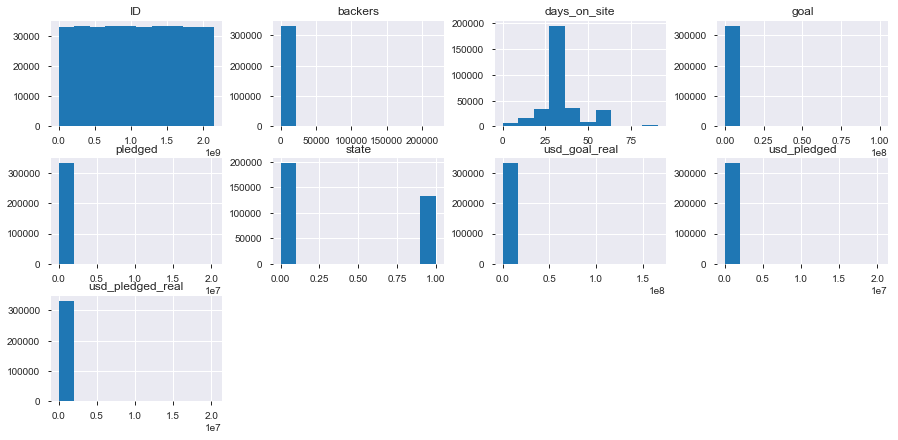

In [22]:
kck.hist(figsize=(15, 7), layout=(3, 4));

In [23]:
num=['int64', 'float64']
obj=['object', 'datetime64[ns]']
kck_obj=kck.select_dtypes(obj)
kck_num=kck.select_dtypes(num)

In [24]:
kck_num_z=kck_num[(np.abs(stats.zscore(kck_num)) < 3).all(axis=1)]

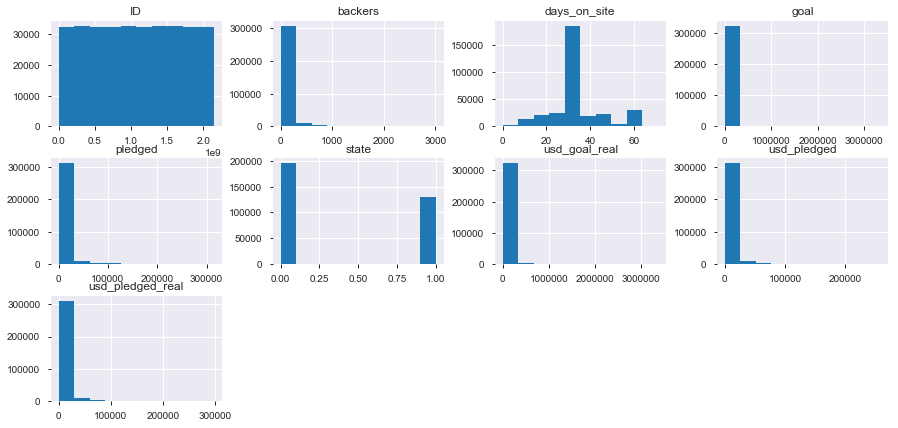

In [26]:
kck_num_z.hist(figsize=(15, 7), layout=(3, 4));

In [27]:
kck_num_z.shape

(325762, 9)

In [28]:
kck_cleaned=pd.concat([kck_num_z, kck_obj], axis=1, join='inner')
kck_cleaned.shape

(325762, 16)

In [29]:
kck_cleaned.to_csv('kickstarter_cleaned.csv', index=False)

## 4. Exploring Data Analysis

In [ ]:
# kck_plt=kck_cleaned.drop(columns='ID')
# pd.plotting.scatter_matrix(kck_plt, figsize=[20,20])
# plt.show()

In [31]:
kck_cleaned.head()

,ID,goal,pledged,state,backers,usd_pledged,usd_pledged_real,usd_goal_real,days_on_site,name,category,main_category,currency,deadline,launched,country
0,1000002330,1000.0,0.0,0,0,0.0,0.0,1533.95,58,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,GB
1,1000003930,30000.0,2421.0,0,15,100.0,2421.0,30000.00,59,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,US
2,1000004038,45000.0,220.0,0,3,220.0,220.0,45000.00,44,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,US
3,1000007540,5000.0,1.0,0,1,1.0,1.0,5000.00,29,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,US
5,1000014025,50000.0,52375.0,1,224,52375.0,52375.0,50000.00,34,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,US


In [ ]:
# plt.figure(figsize=(15,15))
# sns.set(style="ticks", palette="pastel")

# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="main_category", y="goal",
#             hue="state", palette=["m", "g"],
#             data=kck_cleaned)
# sns.despine(offset=10, trim=True)

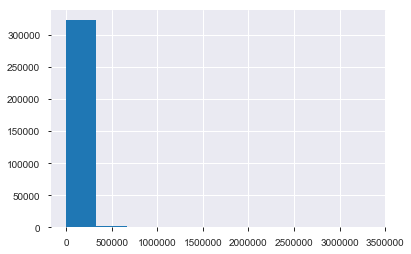

In [32]:
kck_cleaned['goal'].hist()

In [33]:
kck_nonul=kck_cleaned.loc[kck_cleaned['goal']<=10000]
kck_nonul.shape


(225651, 16)

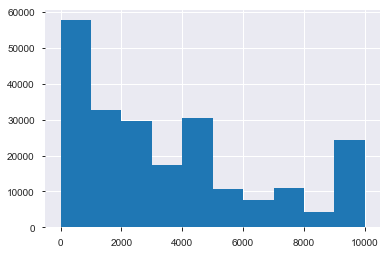

In [34]:
kck_nonul['goal'].hist()

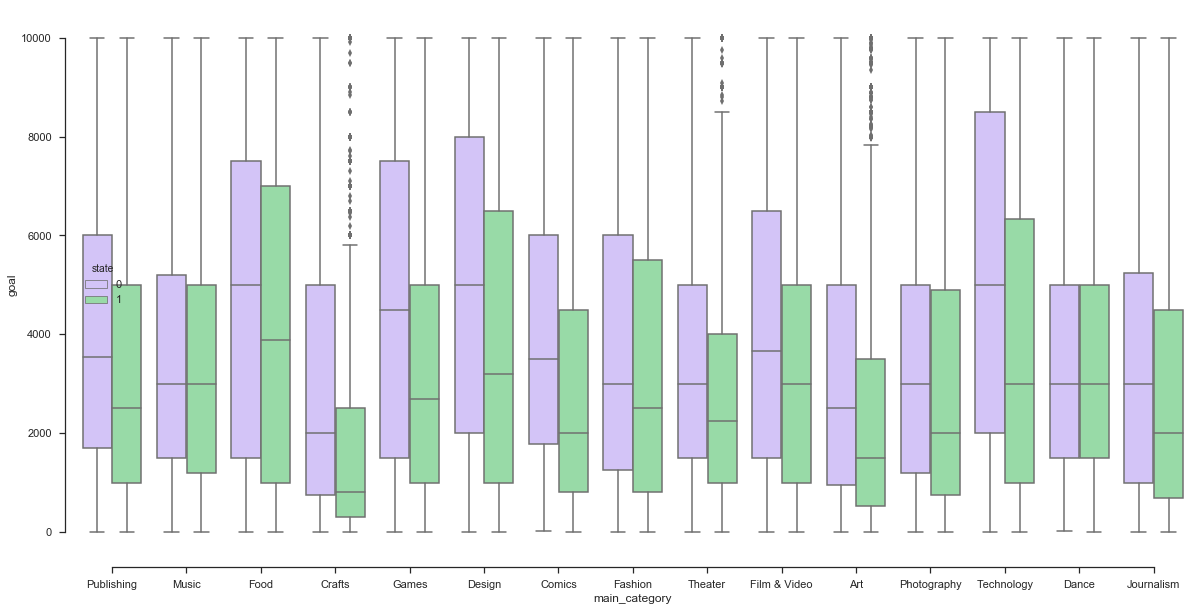

In [35]:
plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="main_category", y="goal",
            hue="state", palette=["m", "g"],
            data=kck_nonul)
sns.despine(offset=10, trim=True)

In [38]:
kck_cleaned['country'].value_counts()

US    256319
GB     29310
CA     12275
AU      6570
DE      3393
FR      2494
NL      2396
IT      2352
ES      1860
SE      1422
MX      1380
NZ      1270
DK       887
IE       682
CH       638
NO       565
BE       520
AT       478
SG       449
HK       430
LU        57
JP        15
Name: country, dtype: int64

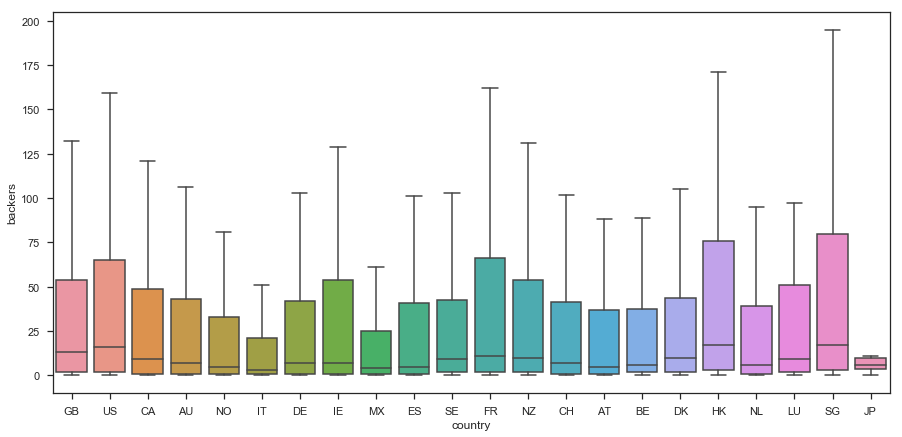

In [83]:
plt.subplots(figsize=(15,7))
sns.boxplot(x='country', y='backers', data=kck_cleaned, showfliers=False)

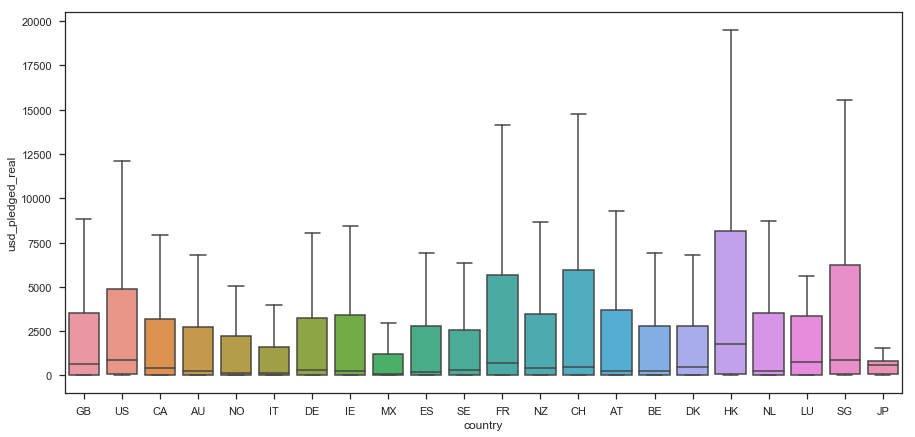

In [85]:
plt.subplots(figsize=(15,7))
sns.boxplot(x='country', y='usd_pledged_real', data=kck_cleaned, showfliers=False)

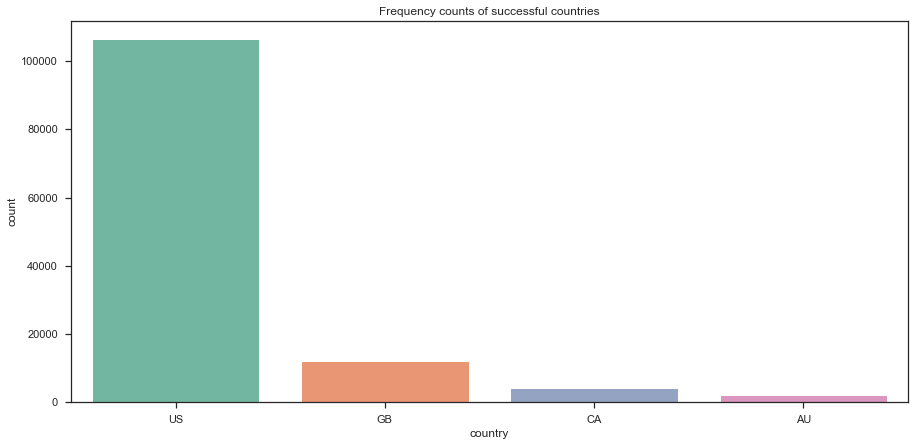

In [77]:

shape = (15, 7)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='country', palette="Set2",data= kck_cleaned[kck_cleaned['state'] == 1].groupby("country").filter(lambda x: len(x) > 1000),
               ax=ax)
plt.title('Frequency counts of successful countries');

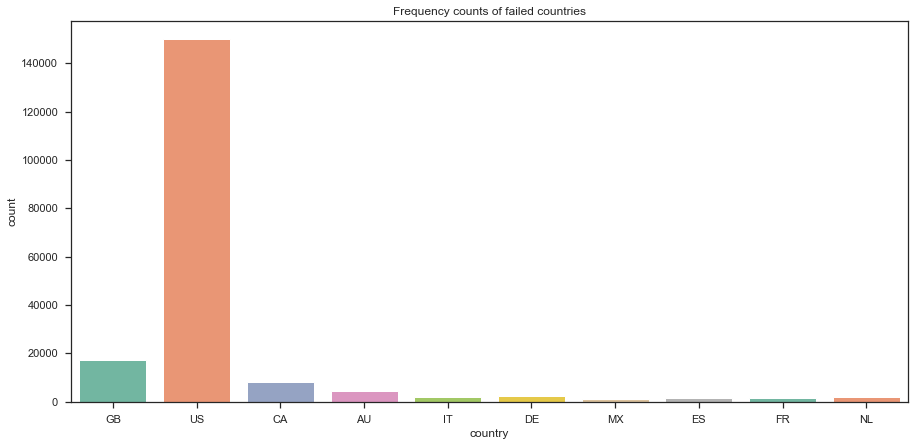

In [78]:

shape = (15, 7)
fig, ax = plt.subplots(figsize = shape)
sns.countplot(x='country', palette="Set2",data= kck_cleaned[kck_cleaned['state'] == 0].groupby("country").filter(lambda x: len(x) > 1000),
               ax=ax)
plt.title('Frequency counts of failed countries');